## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_all = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_all.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
nbr_of_mice = mouse_study_all["Mouse ID"].nunique()
nbr_of_mice


249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = mouse_study_all[mouse_study_all.duplicated(['Mouse ID', 'Timepoint'])]
mice_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# mice_dupes = mouse_study_all[mouse_study_all.duplicated(['Mouse ID', 'Timepoint'])]

mice_dupes = mouse_study_all.loc[mouse_study_all['Mouse ID'] == 'g989', : ]
mice_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Get rid of spaces
mouse_study_all.columns = [c.replace(' ', '_') for c in mouse_study_all.columns]

# Remove the bad mouse
clean_mice_study_data = mouse_study_all[mouse_study_all.Mouse_ID != 'g989']
clean_mice_study_data.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Check the number of mice in the clean DataFrame.
nbr_of_mice = clean_mice_study_data["Mouse_ID"].nunique()

nbr_of_mice

248

## Summary Statistics

In [7]:
# Method 2: Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function. 
# (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

summary_grouped_drug_regimen_df = clean_mice_study_data.groupby('Drug_Regimen').\
                                agg({"Tumor_Volume_(mm3)": ["mean", "median", "var", "std", "sem"]})
summary_grouped_drug_regimen_df 

Tumor_Volume_(mm3)                                          
                           mean     median        var       std       sem
Drug_Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Remove the duplicate mouse ids for each drug type
clean_mouse_drug = clean_mice_study_data.drop_duplicates(subset=['Mouse_ID'])

# Count up the mice in each group
total_mouse_drug_grouped = clean_mouse_drug.groupby('Drug_Regimen', as_index=False).Mouse_ID.count()

# Change the index to the drug name
total_mouse_drug = total_mouse_drug_grouped.set_index('Drug_Regimen', drop=True)

total_mouse_drug

,Mouse_ID
Drug_Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


## Bar and Pie Charts

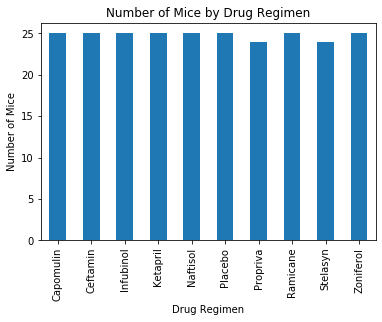

In [9]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen 
# throughout the course of the study.  Note: this plot will be identical to the one that uses Pyplot

drug_plot = total_mouse_drug.plot(kind="bar", legend=False, title ="Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

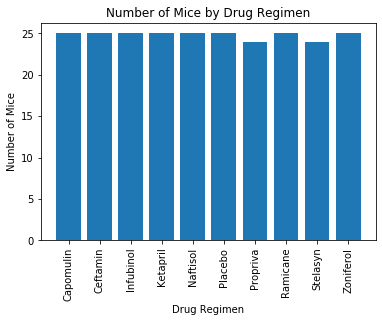

In [10]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen 
# throughout the course of the study. Note: this plot will be identical to the one that uses Pandas

plt.bar(total_mouse_drug_grouped["Drug_Regimen"], total_mouse_drug_grouped["Mouse_ID"])
plt.xticks(rotation=90)
plt.title("Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [11]:
# Group the data by gender
mouse_gender_grouped = clean_mouse_drug.groupby('Sex', as_index=False).count()

# Create a new df that has gender as the index
total_gender = mouse_gender_grouped.set_index('Sex', drop=True)

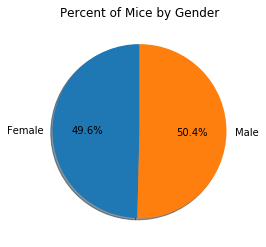

In [12]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
# Note: this plot will be identical to the one that uses Pyplot

total_gender.plot.pie(y='Mouse_ID', legend=False, autopct="%1.1f%%", shadow=True, startangle=90, 
                      title="Percent of Mice by Gender", label='')

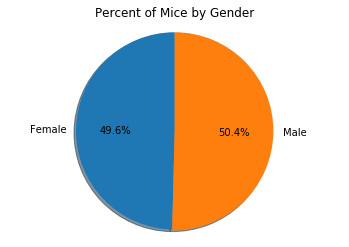

In [13]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
#  Note: this plot will be identical to the one that uses Pandas

plt.pie(mouse_gender_grouped["Mouse_ID"], labels=mouse_gender_grouped["Sex"], 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Percent of Mice by Gender")
plt.show()

# Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_data = clean_mice_study_data[(clean_mice_study_data["Drug_Regimen"] == 'Capomulin') | \
                                 (clean_mice_study_data["Drug_Regimen"] == 'Ramicane') | \
                                 (clean_mice_study_data["Drug_Regimen"] == 'Infubinol') | \
                                 (clean_mice_study_data["Drug_Regimen"] == 'Ceftamin')].groupby('Mouse_ID')


# Start by getting the last (latest) timepoint for each mouse
last_timepoint =  drug_data["Timepoint"].last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_drug_data = pd.merge(clean_mice_study_data, last_timepoint, on=["Mouse_ID", "Timepoint"])
four_drug_data

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [15]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
study_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []

# Loop through the drugs and get the information for each
for drug in study_drugs:
    
    # Pull out one drug
    cur_drug = four_drug_data.loc[four_drug_data['Drug_Regimen'] == drug]
    cur_drug = cur_drug["Tumor_Volume_(mm3)"]
    cur_drug = cur_drug.reset_index(drop=True)
    
    # Add to our array for graphing later
    tumor_list.append(cur_drug)

    # Figure out quartiles
    tumor_quartiles = cur_drug.quantile([.25,.5,.75])    
    lowerq = tumor_quartiles[0.25]
    upperq = tumor_quartiles[0.75]
    iqr = upperq - lowerq

    print(f"The lower quartile of tumor volument for {drug} is: {lowerq}")
    print(f"The upper quartile of tumor volument for {drug} is: {upperq}")
    print(f"The interquartile range of tumor volument for {drug} is {iqr}")
    print(f"The the median tumor volumen for {drug} is: {tumor_quartiles[0.5]} ")

    # Figure out outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Check to see if current drug has any outliers
    outliers = four_drug_data.loc[(four_drug_data['Drug_Regimen'] == drug) & \
                                  ((four_drug_data['Tumor_Volume_(mm3)'] < lower_bound) |\
                                   (four_drug_data['Tumor_Volume_(mm3)'] > upper_bound))]
 
    if len(outliers) > 0:
        print(f"{drug} has {len(outliers)} outliers.")
    else:
        print(f"{drug} has {len(outliers)} outlier(s).")
    print("---------------------------------------------------------------------------\n")
    

The lower quartile of tumor volument for Capomulin is: 32.37735684
The upper quartile of tumor volument for Capomulin is: 40.1592203
The interquartile range of tumor volument for Capomulin is 7.781863460000004
The the median tumor volumen for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has 0 outlier(s).
---------------------------------------------------------------------------

The lower quartile of tumor volument for Ramicane is: 31.56046955
The upper quartile of tumor volument for Ramicane is: 40.65900627
The interquartile range of tumor volument for Ramicane is 9.098536719999998
The the median tumor volumen for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has 0 outlier(s).
---------------------------------------------------------------------------

The lower quartile of tumor volument for Infubinol is: 54.

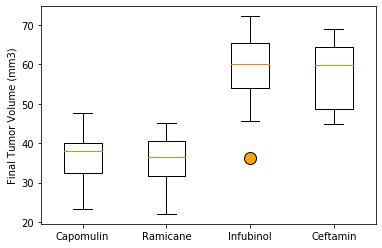

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Color for the outliers
orange_out = dict(markerfacecolor='orange', markersize=12)

# Create the box plot
plt.boxplot(tumor_list, labels = study_drugs, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

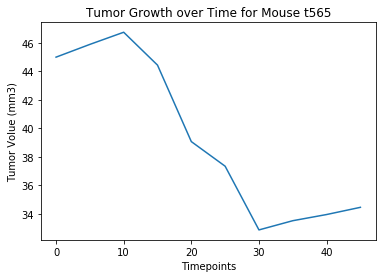

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
t565_data = clean_mice_study_data[(clean_mice_study_data["Drug_Regimen"] == 'Capomulin') & \
                                       (clean_mice_study_data["Mouse_ID"] == 't565')]

t565_data_tumor = t565_data["Tumor_Volume_(mm3)"]

t565_data_time = t565_data["Timepoint"]

plt.plot(t565_data_time, t565_data_tumor)
plt.title("Tumor Growth over Time for Mouse t565")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volue (mm3)")

plt.show()

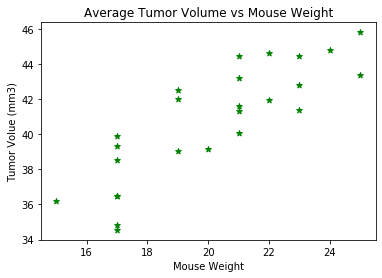

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
capomulin_data = clean_mice_study_data[clean_mice_study_data["Drug_Regimen"] == 'Capomulin'].groupby(["Mouse_ID"])

capomulin_data_mouse_weight = capomulin_data["Weight_(g)"].mean()

capomulin_data_tumor = capomulin_data["Tumor_Volume_(mm3)"].mean()

plt.scatter(capomulin_data_mouse_weight, capomulin_data_tumor, marker="*", color="green")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volue (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volumne is: 0.84
The slope is: y = 0.95x + 21.55


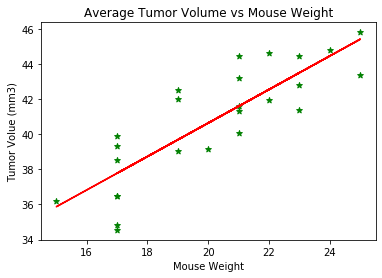

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

correlation = st.pearsonr(capomulin_data_mouse_weight, capomulin_data_tumor)

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_data_mouse_weight, capomulin_data_tumor)
regress_values = capomulin_data_mouse_weight * slope + intercept

# Create the scatter plot and graph it
plt.scatter(capomulin_data_mouse_weight, capomulin_data_tumor, marker="*", color="green")
plt.plot(capomulin_data_mouse_weight,regress_values, '-r')

plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volue (mm3)")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between mouse weight and average tumor volumne is: {round(correlation[0],2)}")
print(f"The slope is: {line_eq}")

plt.show()

# Observations and Insights

1.  My first observation was how similar the setup for each drug was in this study. Except for two, each of the drugs had 25 mice. And the split between female and male was almost 50/50. Of course, I would expect that for a drug study. You would want to make sure things were as equal as possible when studying these drugs to eliminate anything that might question the validity of the data from this study.

2. The data from the study had only one outlier in one drug. There was also only one set of data that had to be dropped from the data. This took me by surprise at first, but I suppose it is because of how careful measurements are taken in a study such as this. You certainly don't want to taint your results because of sloppy work.

3. The mouse (t565) that I randomly picked to graph had a very interesting graph over time. The tumor seemed to have a very pronounced drop in size until timepoint 30, but then started to increase in size. It would be interesting to look at other mice in this drug to see if a pattern develops.